# **1 ) Data Profiling Stage Using Data Profiler**

In [ ]:
!pip install dataprofiler #This Is The Main Module I Will Depend On

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 678.5/678.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.0 MB/s eta 0:00:00
  Created wheel for HLL: filename=HLL-2.0.3-cp310-cp310-linux_x86_64.whl size=30992 sha256=16290af2fc9e0b8d1781d403c2baeb84a0c36e5b05b8e79238dbefc67b8d48a2
  Stored in directory: /root/.cache/pip/wheels/29/dd/c2/485a0bf3a7c12be1330ee29caade82df0fd570ed7dbf1e8b22
Successfully built HLL


In [ ]:
from dataprofiler import Data, Profiler
import json

In [ ]:
# Use Data object to read the DataFrame
data = Data("/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")
#Show First 5 Rows
print(data.data.head())
#Show Columns of the data set
print(data.data.columns)

                                       RowId YearStart YearEnd LocationAbbr  \
0  BRFSS~2019~2019~9002~Q27~TMC03~AGE~GENDER      2019    2019          MDW   
1  BRFSS~2021~2021~9002~Q08~TOC01~AGE~GENDER      2021    2021          MDW   
2    BRFSS~2015~2015~9004~Q43~TOC11~AGE~RACE      2015    2015         WEST   
3      BRFSS~2017~2017~21~Q27~TMC03~AGE~RACE      2017    2017           KY   
4    BRFSS~2021~2021~9003~Q43~TOC11~AGE~RACE      2021    2021          SOU   

  LocationDesc Datasource           Class  \
0      Midwest      BRFSS   Mental Health   
1      Midwest      BRFSS  Overall Health   
2         West      BRFSS  Overall Health   
3     Kentucky      BRFSS   Mental Health   
4        South      BRFSS  Overall Health   

                                             Topic  \
0                 Lifetime diagnosis of depression   
1  Physically unhealthy days (mean number of days)   
2                     Arthritis among older adults   
3                 Lifetime diagnosis o

In [ ]:
# Profile the dataset
profile = Profiler(data) # Calculate Statistics, Entity Recognition, etc
# Generate a report and use json to prettify.
report  = profile.report(report_options={"output_format":"pretty"})
# Print the report
print(report)

INFO:DataProfiler.profilers.profile_builder: Finding the Null values in the columns... 


/usr/local/lib/python3.10/dist-packages/dataprofiler/profilers/profile_builder.py:2903: UserWarning: The data will be profiled with a sample size of 5000. All statistics will be based on this subsample and not the whole dataset.
  warnings.warn(
INFO:DataProfiler.profilers.profile_builder:Finding the Null values in the columns... 
100%|██████████| 33/33 [00:01<00:00, 17.61it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


INFO:DataProfiler.profilers.profile_builder: Calculating the statistics...  (with 4 processes)


INFO:DataProfiler.profilers.profile_builder:Calculating the statistics...  (with 4 processes)
100%|██████████| 33/33 [00:30<00:00,  1.07it/s]


{'global_stats': {'samples_used': 5000, 'column_count': 33, 'row_count': 20586, 'row_has_null_ratio': 0.997, 'row_is_null_ratio': 0.0, 'unique_row_ratio': 1.0, 'duplicate_row_count': 0, 'file_type': 'csv', 'encoding': 'utf-8', 'correlation_matrix': None, 'chi2_matrix': '[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n  nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n  nan, nan, nan, nan, nan], ... , [nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,\n   0.,  0., nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,\n   0.,  0.,  0.,  1.,  1.]]', 'profile_schema': {'RowId': [0], 'YearStart': [1], 'YearEnd': [2], 'LocationAbbr': [3], 'LocationDesc': [4], 'Datasource': [5], 'Class': [6], 'Topic': [7], 'Question': [8], 'Data_Value_Unit': [9], 'DataValueTypeID': [10], 'Data_Value_Type': [11], 'Data_Value': [12], 'Data_Value_Alt': [13], 'Data_Value_Footnote_Symbol': [14], 'Data_Value_Footnote': [15], 'Low_Confidence_Li

In [ ]:
#Save the repot
with open("result.json","w") as reader:
  reader.write(json.dumps(report, indent=4))
  print("Succefully 1 Saved...")

# **2) Data Cleaning Using Pandas**

In [ ]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")

<ipython-input-4-d5f17c2d6ed7>:1: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")


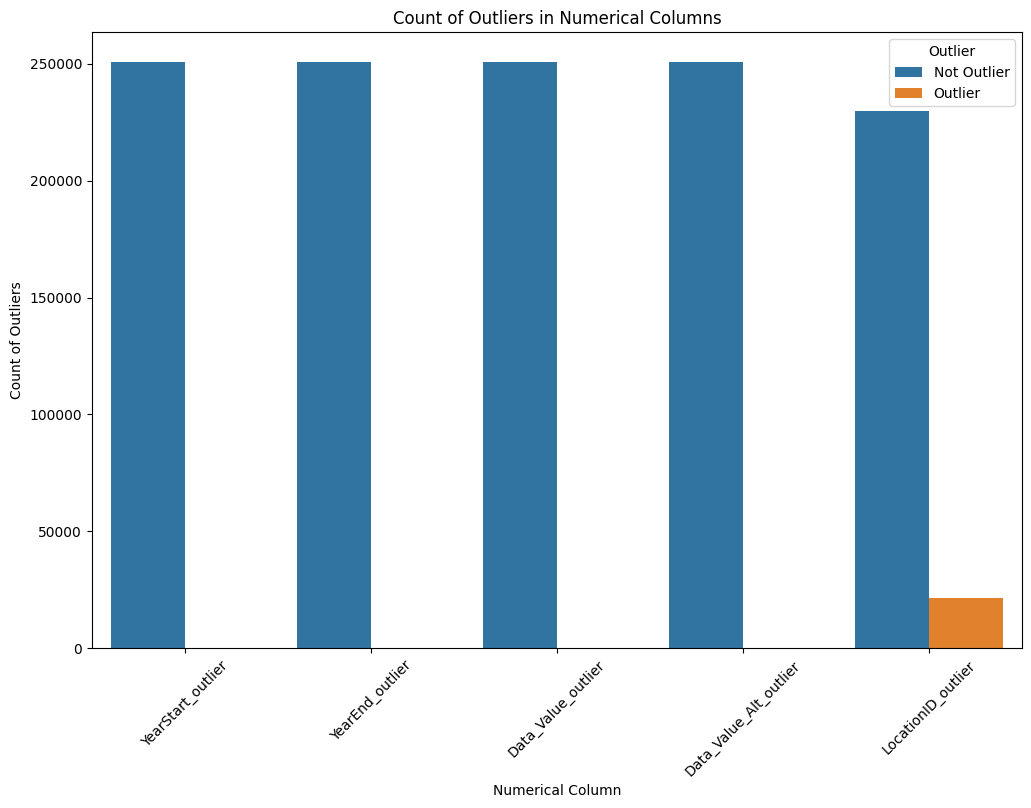

In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers in numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
outliers_df = pd.DataFrame()
for col in numerical_cols:
    outliers_df[col + '_outlier'] = detect_outliers(df[col])

# Stack the outliers DataFrame for visualization
stacked_outliers = outliers_df.stack().reset_index()
stacked_outliers.columns = ['index', 'variable', 'is_outlier']

# Plot outliers using Seaborn
plt.figure(figsize=(12, 8))
sns.countplot(data=stacked_outliers, x='variable', hue='is_outlier')
plt.title('Count of Outliers in Numerical Columns')
plt.xlabel('Numerical Column')
plt.ylabel('Count of Outliers')
plt.xticks(rotation=45)
plt.legend(title='Outlier', labels=['Not Outlier', 'Outlier'])
plt.show()

***Data Discovery***

In [ ]:
# Sampling the data for better data veiw
df.sample(11)

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Latitude,Longitude
138037,BRFSS~2019~2019~13~Q44~TOC12~AGE~RACE,2019,2019,GA,Georgia,BRFSS,Overall Health,Severe joint pain among older adults with arth...,Severe joint pain due to arthritis among older...,%,...,C01,TOC12,Q44,13,AGE,AGE_OVERALL,RACE,BLK,POINT(-83.62758034599966 32.83968109300048),POINT(-83.62758034599966 32.83968109300048)
103048,BRFSS~2018~2018~23~Q33~TOC08~AGE~GENDER,2018,2018,ME,Maine,BRFSS,Overall Health,Self-rated health (good to excellent health),Percentage of older adults who self-reported t...,%,...,C01,TOC08,Q33,23,AGE,AGE_OVERALL,GENDER,FEMALE,POINT(-68.98503133599962 45.254228894000505),POINT(-68.98503133599962 45.254228894000505)
237822,BRFSS~2018~2018~49~Q34~TOC09~AGE~GENDER,2018,2018,UT,Utah,BRFSS,Overall Health,Prevalence of sufficient sleep,Percentage of older adults getting sufficient ...,%,...,C01,TOC09,Q34,49,AGE,65PLUS,GENDER,FEMALE,POINT(-111.58713063499971 39.360700171000474),POINT(-111.58713063499971 39.360700171000474)
203996,BRFSS~2017~2017~34~Q32~TOC07~AGE~GENDER,2017,2017,NJ,New Jersey,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,...,C01,TOC07,Q32,34,AGE,5064,GENDER,MALE,POINT(-74.27369128799967 40.13057004800049),POINT(-74.27369128799967 40.13057004800049)
14200,BRFSS~2020~2020~30~Q33~TOC08~AGE~OVERALL,2020,2020,MT,Montana,BRFSS,Overall Health,Self-rated health (good to excellent health),Percentage of older adults who self-reported t...,%,...,C01,TOC08,Q33,30,AGE,65PLUS,OVERALL,OVERALL,POINT(-109.42442064499971 47.06652897200047),POINT(-109.42442064499971 47.06652897200047)
174394,BRFSS~2018~2018~54~Q17~TAC01~AGE~RACE,2018,2018,WV,West Virginia,BRFSS,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,%,...,C04,TAC01,Q17,54,AGE,5064,RACE,ASN,POINT(-80.71264013499967 38.66551020200046),POINT(-80.71264013499967 38.66551020200046)
18570,BRFSS~2016~2021~26~Q41~TCC03~AGE~OVERALL,2016,2021,MI,Michigan,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,%,...,C06,TCC03,Q41,26,AGE,AGE_OVERALL,OVERALL,OVERALL,POINT(-84.71439026999968 44.6613195430005),POINT(-84.71439026999968 44.6613195430005)
139645,BRFSS~2015~2015~9002~Q38~TGC03~AGE~GENDER,2015,2015,MDW,Midwest,BRFSS,Caregiving,Duration of caregiving among older adults,Percentage of older adults who provided care t...,%,...,C07,TGC03,Q38,9002,AGE,5064,GENDER,MALE,NaN,NaN
191503,BRFSS~2015~2015~51~Q41~TCC03~AGE~RACE,2015,2015,VA,Virginia,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,%,...,C06,TCC03,Q41,51,AGE,AGE_OVERALL,RACE,HIS,POINT(-78.45789046299967 37.54268067400045),POINT(-78.45789046299967 37.54268067400045)
72909,BRFSS~2018~2018~23~Q11~TSC11~AGE~RACE,2018,2018,ME,Maine,BRFSS,Screenings and Vaccines,Up-to-date with recommended vaccines and scree...,Percentage of older adult women who are up to ...,%,...,C03,TSC11,Q11,23,AGE,AGE_OVERALL,RACE,HIS,POINT(-68.98503133599962 45.254228894000505),POINT(-68.98503133599962 45.254228894000505)


In [ ]:
#Fast Statistical Info Fetching the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       250937 non-null  object 
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Data_Value_Unit             250937 non-null  object 
 10  DataValueTypeID             250937 non-null  object 
 11  Data_Value_Type             250937 non-null  object 
 12  Data_Value                  169302 non-null  float64
 13  Data_Value_Alt

In [ ]:
#Ensuring the duplicates existence in the data
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
250932    False
250933    False
250934    False
250935    False
250936    False
Length: 250937, dtype: bool

In [ ]:
'''
Answer :
Categorical columns :
 ['RowId', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'Latitude', 'Longitude']
Numerical columns : ['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'LocationID']
'''

# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['RowId', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'Latitude', 'Longitude']
Numerical columns : ['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'LocationID']


In [ ]:
#The purpose of this line is to fetch for unique values then fetch for them if they don't have role we can drop them from our data
df[cat_col].nunique()

RowId                         31676
LocationAbbr                     59
LocationDesc                     59
Datasource                        1
Class                             7
Topic                            39
Question                         39
Data_Value_Unit                   2
DataValueTypeID                   2
Data_Value_Type                   2
Data_Value_Footnote_Symbol        5
Data_Value_Footnote               5
Low_Confidence_Limit           1979
High_Confidence_Limit          1969
StratificationCategory1           1
Stratification1                   3
StratificationCategory2           2
Stratification2                   7
Geolocation                      54
ClassID                           7
TopicID                          39
QuestionID                       39
StratificationCategoryID1         1
StratificationID1                 3
StratificationCategoryID2         3
StratificationID2                 8
Latitude                         54
Longitude                   

In [ ]:
#Sample for column while fetching nunique return values was carrying 1
print(df['Datasource'].unique())

['BRFSS']


In [ ]:
#For while here i have doubt regardin those 2 columns and there is difference between them
print("The YearStart and YearEnd Series are equal.") if (df['YearStart'] == df['YearEnd']).all() else print("The YearStart and YearEnd Series are not equal.")

The YearStart and YearEnd Series are not equal.


In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.drop_duplicates(inplace=True)

print(df.isnull().sum())

RowId                         0
YearStart                     0
YearEnd                       0
LocationAbbr                  0
LocationDesc                  0
Datasource                    0
Class                         0
Topic                         0
Question                      0
Data_Value_Unit               0
DataValueTypeID               0
Data_Value_Type               0
Data_Value                    0
Data_Value_Alt                0
Data_Value_Footnote_Symbol    0
Data_Value_Footnote           0
Low_Confidence_Limit          0
High_Confidence_Limit         0
StratificationCategory1       0
Stratification1               0
StratificationCategory2       0
Stratification2               0
Geolocation                   0
ClassID                       0
TopicID                       0
QuestionID                    0
LocationID                    0
StratificationCategoryID1     0
StratificationID1             0
StratificationCategoryID2     0
StratificationID2             0
Latitude

# **3) Data Validation Pandera**

In [ ]:
!pip install pandera[io]
!pip install Cerberus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.1/414.1 kB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for petl: filename=petl-1.7.15-py3-none-any.whl size=230718 sha256=72ecd9c410f591816dcdc639d20d38d02dd35ce7ebde3bbfa47acad62504e3c7
  Stored in directory: /root/.cache/pip/wheels/25/98/91/62fbf9f9cb32952d7d91532152b893f7eab007f6aea750a3f5
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=35

***Validation Step Using (Pandera)***

In [ ]:
import pandera as pa
from cerberus import Validator
from pandera import Column, DataFrameSchema, Check, Index, MultiIndex, DateTime

In [ ]:
schema = DataFrameSchema({
    "RowId": Column(int, nullable=True),
    "YearStart": Column(int, Check.greater_than_or_equal_to(0)),
    "YearEnd": Column(int, Check.greater_than_or_equal_to(0)),
    "LocationAbbr": Column(str),
    "LocationDesc": Column(str),
    "Datasource": Column(str),
    "Class": Column(str),
    "Topic": Column(str),
    "Question": Column(str),
    "Data_Value_Unit": Column(str),
    "DataValueTypeID": Column(str),
    "Data_Value_Type": Column(str),
    "Data_Value": Column(float, Check.greater_than_or_equal_to(0)),
    "Data_Value_Alt": Column(float, nullable=True),
    "Data_Value_Footnote_Symbol": Column(str, nullable=True),
    "Data_Value_Footnote": Column(str, nullable=True),
    "Low_Confidence_Limit": Column(float),
    "High_Confidence_Limit": Column(float),
    "StratificationCategory1": Column(str),
    "Stratification1": Column(str),
    "StratificationCategory2": Column(str, nullable=True),
    "Stratification2": Column(str, nullable=True),
    "Geolocation": Column(str, nullable=True),
    "ClassID": Column(str),
    "TopicID": Column(str),
    "QuestionID": Column(str),
    "LocationID": Column(str),
    "StratificationCategoryID1": Column(str),
    "StratificationID1": Column(str),
    "StratificationCategoryID2": Column(str, nullable=True),
    "StratificationID2": Column(str, nullable=True),
    "Latitude": Column(float, nullable=True),
    "Longitude": Column(float, nullable=True),
})

try:
    schema.validate(df, lazy=True)
except pa.errors.SchemaErrors as exc:
    failure_cases_df = exc.failure_cases
    display(exc.failure_cases)

,schema_context,column,check,check_number,failure_case,index
0,Column,RowId,dtype('int64'),None,object,None
167285,Column,LocationID,dtype('str'),None,21,167282
167287,Column,LocationID,dtype('str'),None,53,167284
167288,Column,LocationID,dtype('str'),None,72,167285
167289,Column,LocationID,dtype('str'),None,48,167286
...,...,...,...,...,...,...
83651,Column,LocationID,dtype('str'),None,26,83648
83652,Column,LocationID,dtype('str'),None,27,83649
83653,Column,LocationID,dtype('str'),None,16,83650
83654,Column,LocationID,dtype('str'),None,5,83651


In [ ]:
inferred_schema = pa.infer_schema(df).to_script()

with open("Schema.txt","w") as reader:
  reader.write(inferred_schema)
  print("Succefully 2 Saved...")

Succefully 2 Saved...


# **4)   Privacy and Security Policies**

In [ ]:
!pip install faker
!pip install anonymizedf
!pip install nltk

In [ ]:
import random
import numpy as np
import nltk
import hashlib
nltk.download('punkt')

from anonymizedf.anonymizedf import anonymize
from faker import Faker
from nltk.tokenize import word_tokenize
from cryptography.fernet import Fernet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def scramble_data(data):
    data_list = list(data)
    random.shuffle(data_list)
    return ''.join(data_list)

def tokenize_data(data): return word_tokenize(data)

with open("encryption.key", "wb") as file_handler:
    key = Fernet.generate_key()
    print(f"Generated key : {key.decode()}")
    file_handler.write(hashlib.sha256(key).hexdigest().encode())


def check_key(key):
    with open("encryption.key", "rb") as file_handler:
        hashed_key = file_handler.read()
        return True if hashed_key.decode() == hashlib.sha256(key.encode()).hexdigest() else False


def encrypt(x, key):
     return Fernet(key.encode()).encrypt(str(x).encode()).decode() if check_key(key) else x

Generated key : QMnwjStyEGcoJISN2KCkZLW8E__EudZECPyAl6CmBS4=


In [ ]:
an = anonymize(df)
faker = Faker()
key = Fernet.generate_key()
cipher = Fernet(key)

In [ ]:
# Mask sensitive columns
an.fake_names("RowId")
an.fake_categories("LocationAbbr")
an.fake_names("LocationDesc")
an.fake_names("Stratification1")
an.fake_names("Stratification2")
an.fake_names("Geolocation")
an.fake_categories("Latitude")
an.fake_categories("Longitude")


# Null sensitive columns
df['RowId'] , df['LocationID'] = [faker.uuid4() for _ in range(len(df))] , [faker.random_number(digits=5) for _ in range(len(df))]

df['Scrambled_LocationDesc'] = df['LocationDesc'].apply(scramble_data)

df['Tokenized_Question'] = df['Question'].apply(tokenize_data)

df['Hashed_Latitude'] = df['Latitude'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

In [ ]:
encrypted_df = df.copy()
encrypted_df.loc[:, "Longitude"] = encrypted_df["Longitude"].apply(lambda x : encrypt(x, "QMnwjStyEGcoJISN2KCkZLW8E__EudZECPyAl6CmBS4="))
encrypted_df.loc[:, "Latitude"] = encrypted_df["Latitude"].apply(lambda x : encrypt(x, "QMnwjStyEGcoJISN2KCkZLW8E__EudZECPyAl6CmBS4="))
encrypted_df.loc[:, "Question"] = encrypted_df["Question"].apply(lambda x : encrypt(x, "QMnwjStyEGcoJISN2KCkZLW8E__EudZECPyAl6CmBS4="))

**RBAC**

In [ ]:
'''
This Step Will Be In Separeted PY File
'''

# **Insights Extraction**

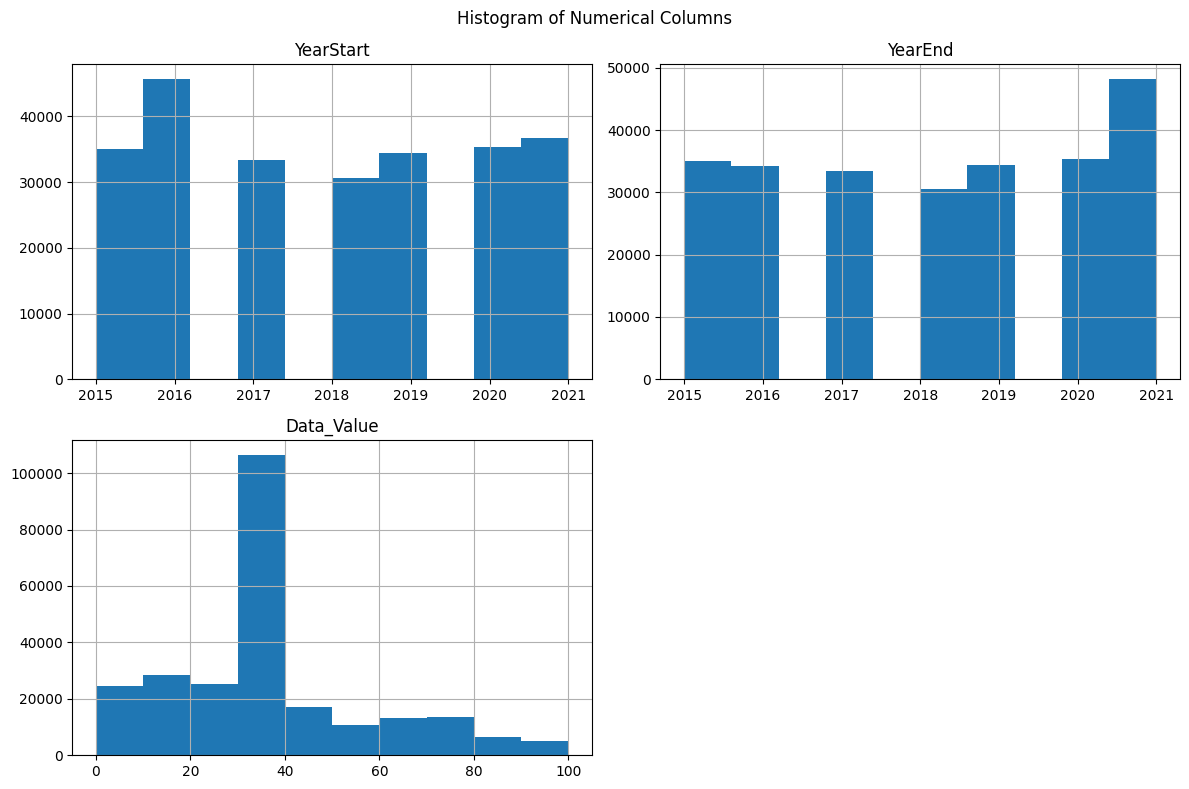

In [ ]:
numerical_cols = ['YearStart', 'YearEnd', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']
df[numerical_cols].hist(figsize=(12, 8))
plt.suptitle('Histogram of Numerical Columns')
plt.tight_layout()
plt.show()

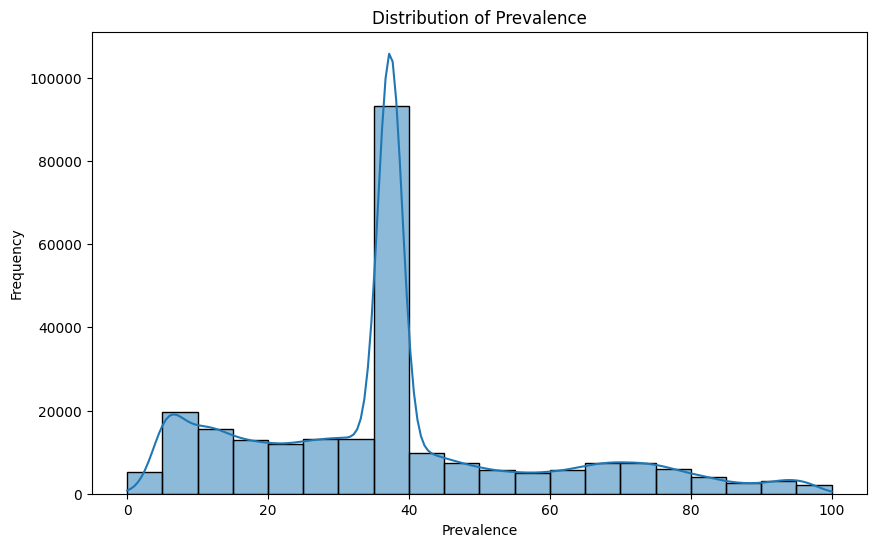

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Data_Value', bins=20, kde=True)
plt.title('Distribution of Prevalence')
plt.xlabel('Prevalence')
plt.ylabel('Frequency')
plt.show()

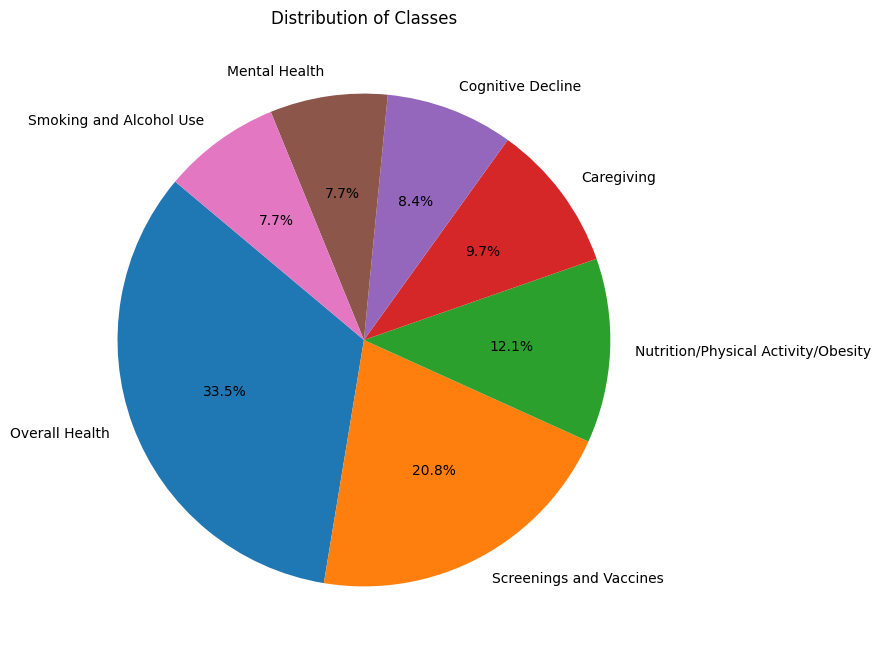

In [ ]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()

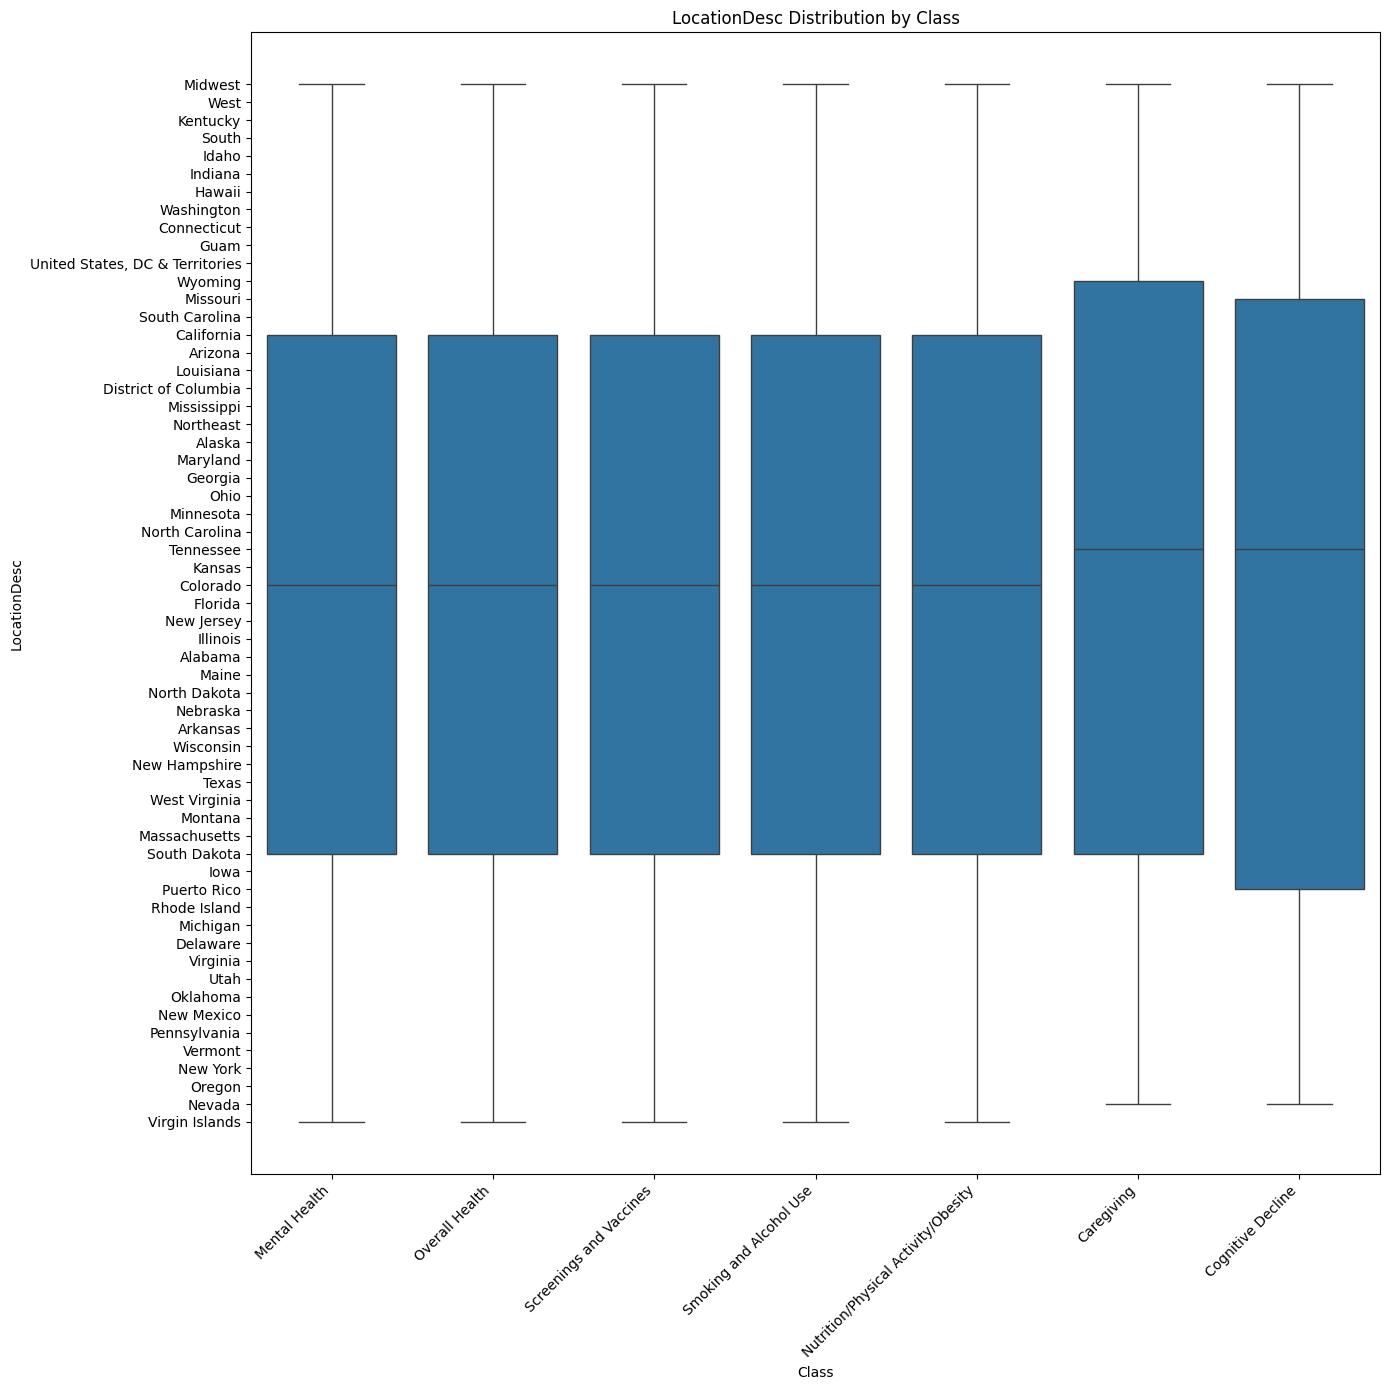

In [ ]:
plt.figure(figsize=(14, 14))
sns.boxplot(data=df, y='LocationDesc', x='Class')
plt.title('LocationDesc Distribution by Class')
plt.xlabel('Class')
plt.ylabel('LocationDesc')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-32-1ac274221428>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Class', y='Data_Value', ci='sd')


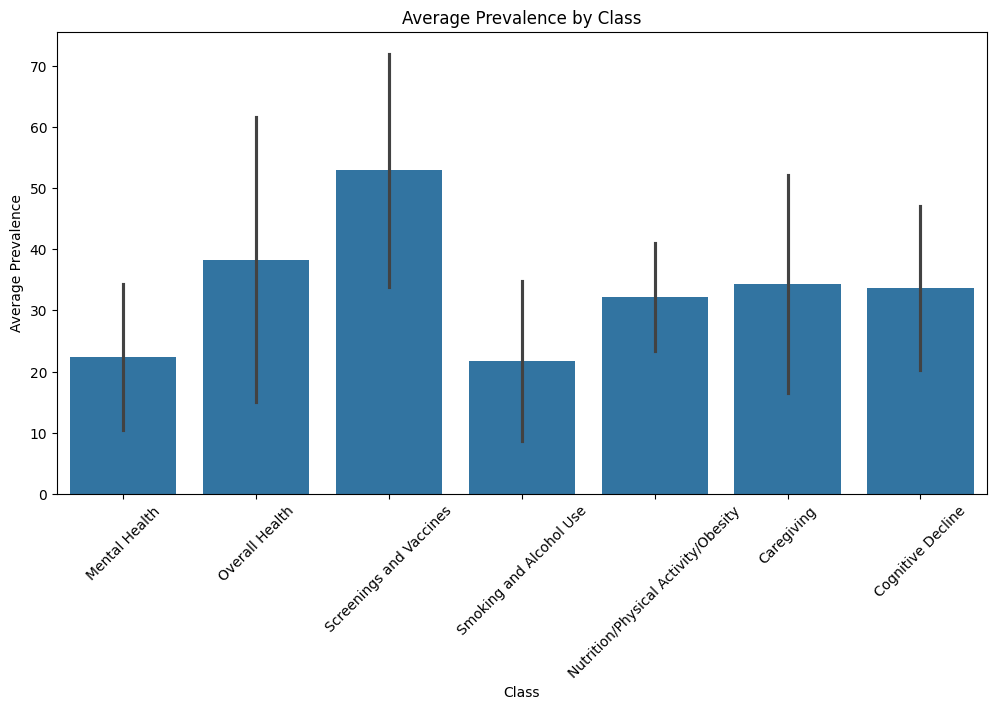

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Class', y='Data_Value', ci='sd')
plt.title('Average Prevalence by Class')
plt.xlabel('Class')
plt.ylabel('Average Prevalence')
plt.xticks(rotation=45)
plt.show()

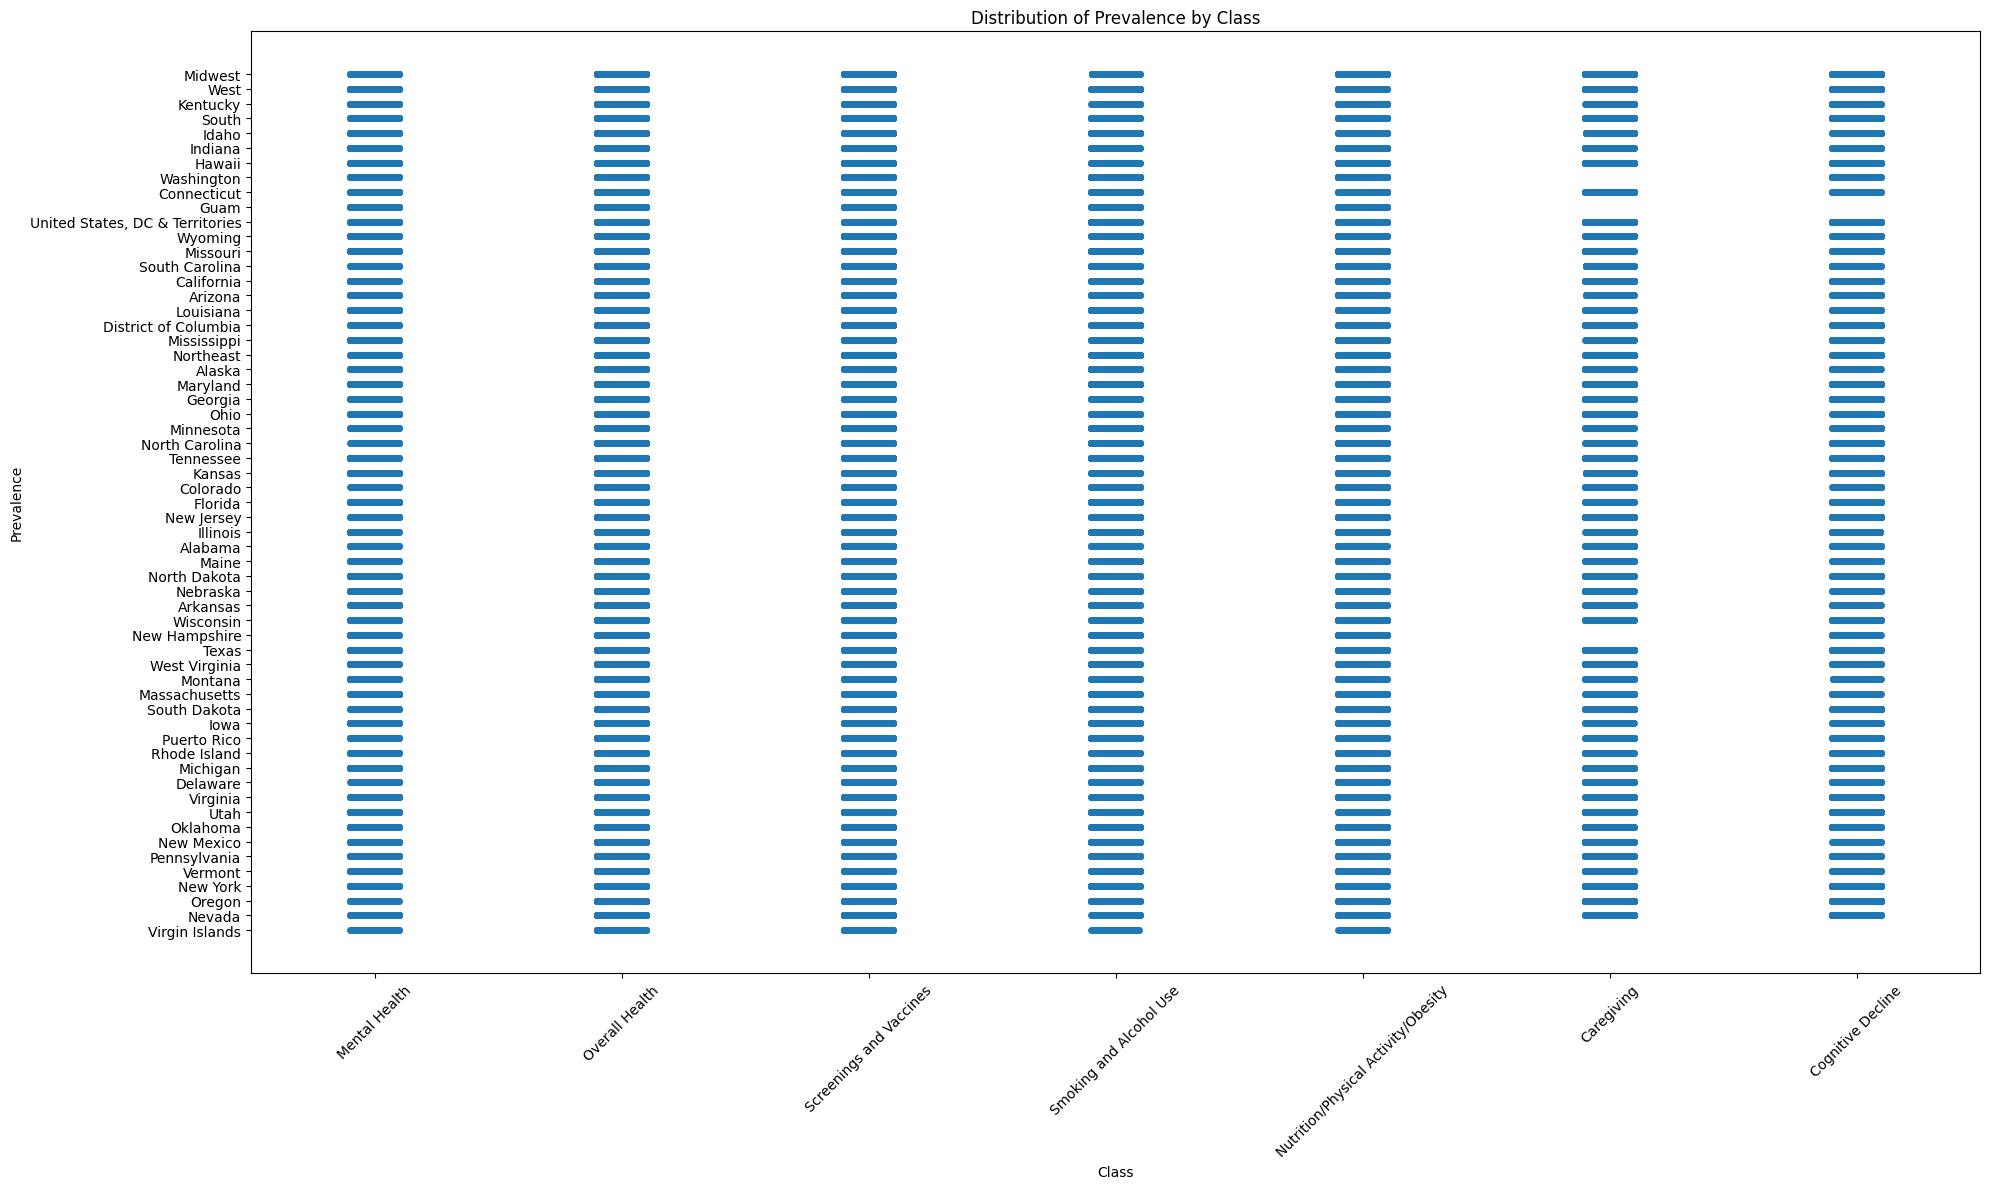

In [ ]:
unique_locations = len(df['LocationDesc'].unique())
fig_width = max(16, min(20, unique_locations * 0.5))

plt.figure(figsize=(fig_width, 12))
sns.stripplot(data=df, x='Class', y='LocationDesc', jitter=True)
plt.title('Distribution of Prevalence by Class')
plt.xlabel('Class')
plt.ylabel('Prevalence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***Result***

In [ ]:
df.to_csv("After Modifications 202200953.csv",index=False)
encrypted_df.to_csv("After Modifications 202200953_encrypted.csv",index=False)